In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams.update({'font.size': 14})

In [2]:
file_nl = h5py.File('out_NL','r')
col_nl = file_nl['markov_chain_0']['data']
mmax_nl = np.array(col_nl['M_max'])
file_np = h5py.File('out_NP','r')
col_np = file_np['markov_chain_0']['data']
mmax_np = np.array(col_np['M_max'])
file_ml = h5py.File('out_ML','r')
col_ml = file_ml['markov_chain_0']['data']
mmax_ml = np.array(col_ml['M_max'])
file_mp = h5py.File('out_MP','r')
col_mp = file_mp['markov_chain_0']['data']
mmax_mp = np.array(col_mp['M_max'])
#mult = np.array(col['mult'])
#ln_wgt = np.array(col['log_wgt'])
#wgt = np.exp(ln_wgt)

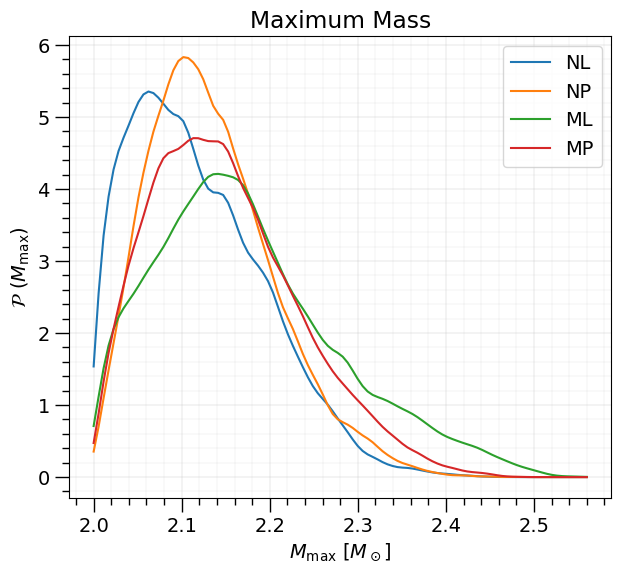

In [16]:
#density1 = stats.gaussian_kde(mmax, weights=mult)
den_nl = stats.gaussian_kde(mmax_nl)
den_np = stats.gaussian_kde(mmax_np)
den_ml = stats.gaussian_kde(mmax_ml)
den_mp = stats.gaussian_kde(mmax_mp)
#plt.hist(mmax, bins=60, density=True, histtype='step');
#plt.hist(mmax, bins=60, density=True, weights=ln_wgt, histtype='step');
x = np.linspace(2.0, 2.56, num=100, dtype=float)
#plt.plot(x, density1(x))
plt.figure(figsize=(7,6))
plt.plot(x, den_nl(x), label='NL')
plt.plot(x, den_np(x), label='NP')
plt.plot(x, den_ml(x), label='ML')
plt.plot(x, den_mp(x), label='MP')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xlabel('$M_\mathrm{max} \ [M_\odot]$')
plt.ylabel('$\mathcal{P} \ (M_\mathrm{max})$')
plt.title('Maximum Mass')
plt.grid(which='major', linewidth=0.2)
plt.grid(which='minor', linewidth=0.1)
plt.legend()
plt.savefig('figs/hist_mmax.png', format='png')
plt.show()

In [7]:
file_ns = h5py.File('tmp/main2_ML.o2')
col = file_ns['markov_chain_0']['data']
width_ns = np.array(col['width_NS'])
width_wd = np.array(col['width_WD'])
width_lm = np.array(col['width_LM'])
den_ns = stats.gaussian_kde(width_ns)
den_wd = stats.gaussian_kde(width_wd)
den_lm = stats.gaussian_kde(width_lm)

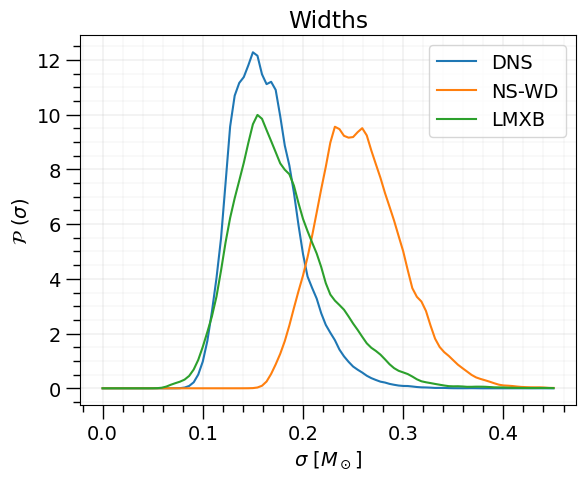

In [14]:
#plt.figure(figsize=(7,6))
x = np.linspace(0.0, 0.45, num=100, dtype=float)
plt.plot(x, den_ns(x), label='DNS')
plt.plot(x, den_wd(x), label='NS-WD')
plt.plot(x, den_lm(x), label='LMXB')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xlabel('$\sigma \ [M_\odot]$')
plt.ylabel('$\mathcal{P}~(\sigma)$')
plt.title('Widths')
plt.grid(which='major', linewidth=0.2)
plt.grid(which='minor', linewidth=0.1)
plt.legend()
plt.savefig('figs/hist_widths.png', format='png')
plt.show()

In [15]:
sns=np.array([0.154, 0.147, 0.151, 0.247])
swd=np.array([0.230, 0.252, 0.214, 0.273])
slm=np.array([0.154, 0.183, 0.180, 0.251])
print('NS width: ', np.mean(sns))
print('WD width: ', np.mean(swd))
print('LM width: ', np.mean(slm))

NS width:  0.17475
WD width:  0.24225
LM width:  0.19199999999999998


In [18]:
ans=np.array([0.285, -0.285, -0.325, 0.225])
awd=np.array([-0.4, -0.08, 0.125, 0.28])
alm=np.array([-0.25, -0.45, -0.74, 0.02])
print('NS skewness: ', np.mean(ans))
print('WD skewness: ', np.mean(awd))
print('LM skewness: ', np.mean(alm))

NS skewness:  -0.025
WD skewness:  -0.018750000000000003
LM skewness:  -0.355


In [ ]:
rate_perc=np.zeros((4,12))
model=['ml','mp','nl','np']
for j, mod in enumerate(model):
  for i in range(4,16):
    if (i<10):
      file=h5py.File('run0'+str(i)+'/'+model[j]+'_out','r')
    else:
      file=h5py.File('run'+str(i)+'/'+model[j]+'_out','r')
    n_accept=np.array(file['n_accept'])
    n_reject=np.array(file['n_reject'])
    avg_rate=np.average(n_accept/(n_accept+n_reject))
    rate_perc[j,i-4]=avg_rate*100

In [ ]:
runs=np.arange(4,16)
plt.plot(runs,rate_perc[0], label='mlines')
plt.plot(runs,rate_perc[1], label='mpoly')
plt.plot(runs,rate_perc[2], label='nlines')
plt.plot(runs,rate_perc[3], label='npoly')
plt.xlabel("Run #")
plt.ylabel("Avg. Acceptance Rate (%)")
plt.title("Runs on PSC Bridges-2")
plt.grid()
plt.legend()
plt.savefig("acp_rate.png")
plt.show()

In [ ]:
for count, name in enumerate(['cow','horse']):
    print(count)

In [ ]:
arr=['cow','horse','chicken']
#arr=np.array(arr)
len(arr)

In [ ]:
markov_chain=file['markov_chain_0']
list(markov_chain.keys())

In [ ]:
col_names=markov_chain['data']
list(col_names.keys())

In [ ]:
mf_0740=np.array(col_names['mf_0740'])
mf_0740.shape


In [ ]:
mf_0740